In [8]:
import pandas as pd
import numpy as np
from data_extraction import drought_data
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from data_extraction_fires import fires_data
from citipy import citipy

In [9]:
fires_df = fires_data()
fires_df

,LATITUDE,LONGITUDE,FIRE_TYPE,IG_DATE,ACRES,YEAR,MILES
0,62.949,-162.901,Wildfire,2000-12-27,12003,2000,18.754687
1,63.767,-152.076,Wildfire,2000-06-23,18065,2000,28.226562
2,63.833,-155.804,Wildfire,2000-06-25,31347,2000,48.979688
3,63.838,-150.726,Wildfire,2000-06-25,4863,2000,7.598438
4,63.872,-150.715,Wildfire,2000-06-24,12071,2000,18.860938
...,...,...,...,...,...,...,...
8298,44.731,-110.982,Wildfire,2016-08-09,103193,2016,161.239063
8299,44.867,-109.700,Wildfire,2016-08-10,3702,2016,5.784375
8300,44.936,-110.913,Wildfire,2016-08-05,3161,2016,4.939063
8301,44.981,-110.291,Wildfire,2016-08-13,13706,2016,21.415625


In [16]:
lats = fires_df['LATITUDE']
lngs = fires_df['LONGITUDE']
cities = []

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['bethel',
 'kenai',
 'wasilla',
 'college',
 'fairbanks',
 'barrow',
 'moss point',
 'crestview',
 'saraland',
 'selma',
 'northport',
 'gadsden',
 'monticello',
 'hot springs',
 'sherwood',
 'russellville',
 'nogales',
 'green valley',
 'florence',
 'safford',
 'payson',
 'show low',
 'kingman',
 'flagstaff',
 'saint george',
 'hurricane',
 'tecate',
 'temecula',
 'calabasas',
 'lompoc',
 'taft',
 'tehachapi',
 'atascadero',
 'king city',
 'ridgecrest',
 'coalinga',
 'los banos',
 'merced',
 'napa',
 'south lake tahoe',
 'clearlake',
 'ukiah',
 'paradise',
 'red bluff',
 'magalia',
 'sun valley',
 'fortuna',
 'susanville',
 'ashland',
 'cortez',
 'alamosa',
 'lamar',
 'grand junction',
 'fountain',
 'redlands',
 'ken caryl',
 'clifton',
 'boulder',
 'craig',
 'loveland',
 'rock springs',
 'tamiami',
 'weston',
 'golden gate',
 'bonita springs',
 'belle glade',
 'immokalee',
 'lehigh acres',
 'sebring',
 'yeehaw junction',
 'avon park',
 'micco',
 'lake wales',
 'palm bay',
 'west mel

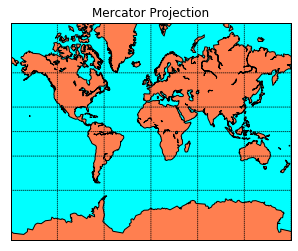

In [3]:
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()